In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Elastic%20Net%20Regression/gym_members_exercise_tracking.csv"

--2024-11-15 15:29:00--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Elastic%20Net%20Regression/gym_members_exercise_tracking.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65136 (64K) [text/plain]
Saving to: ‘gym_members_exercise_tracking.csv’

gym_members_exercis 100%[===================>]  63.61K  --.-KB/s    in 0.02s   

2024-11-15 15:29:00 (2.78 MB/s) - ‘gym_members_exercise_tracking.csv’ saved [65136/65136]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('/content/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

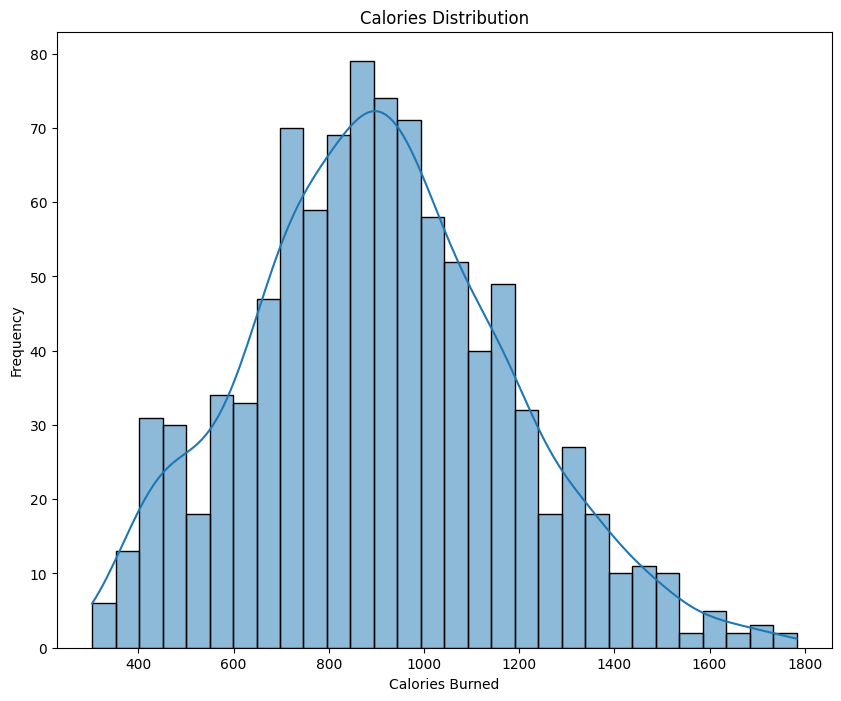

In [6]:
plt.figure(figsize = (10,8))
sns.histplot(df,x = 'Calories_Burned', kde = True, bins = 30)
plt.title("Calories Distribution")
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [8]:
numerical_features = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'
]
categorical_features = ['Gender', 'Workout_Type']


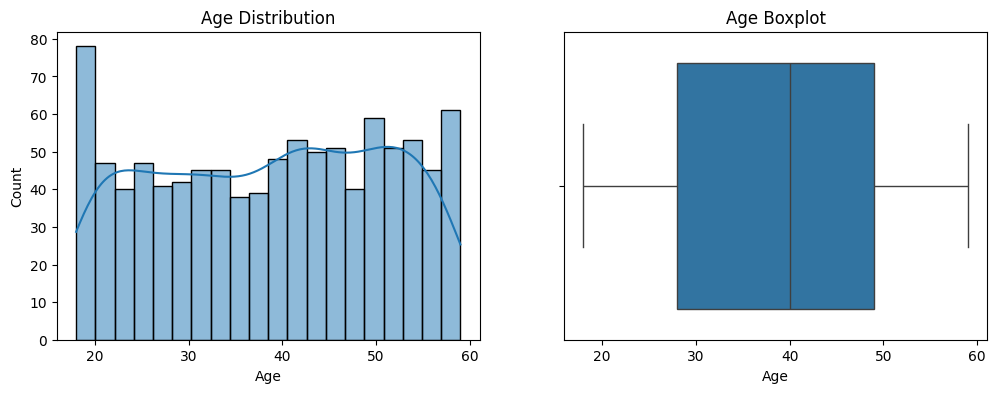

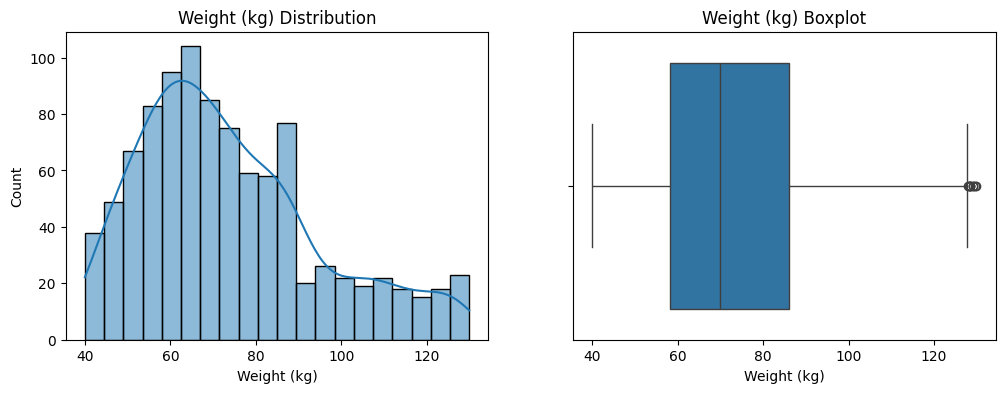

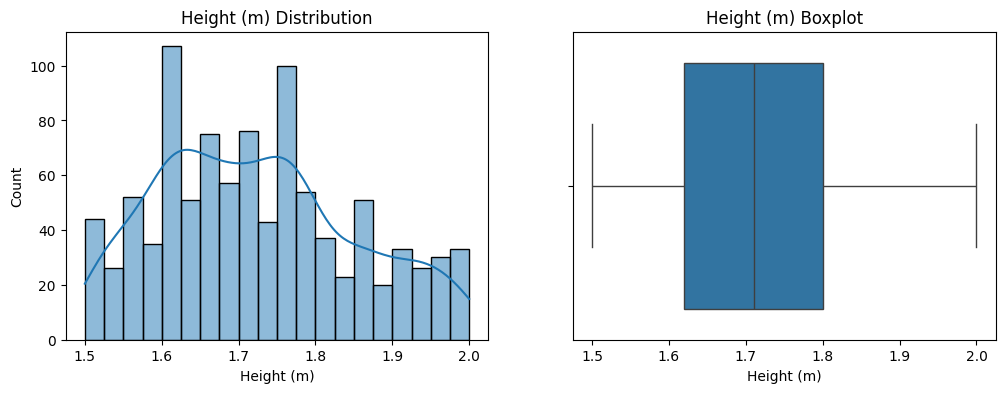

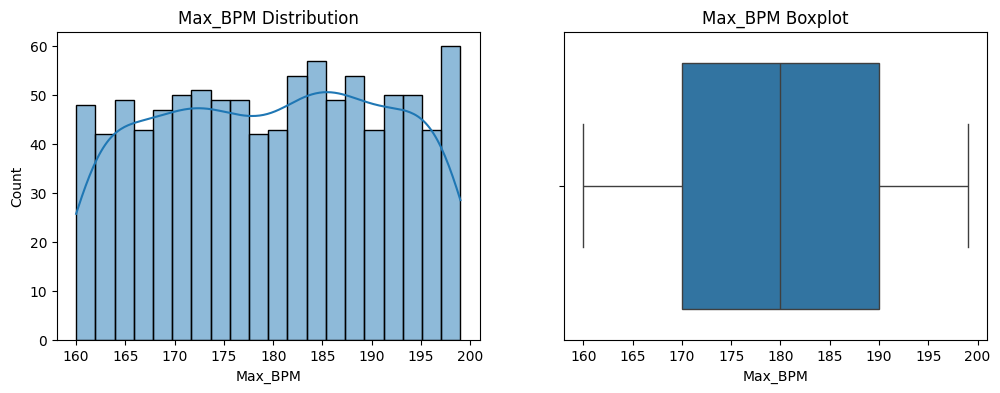

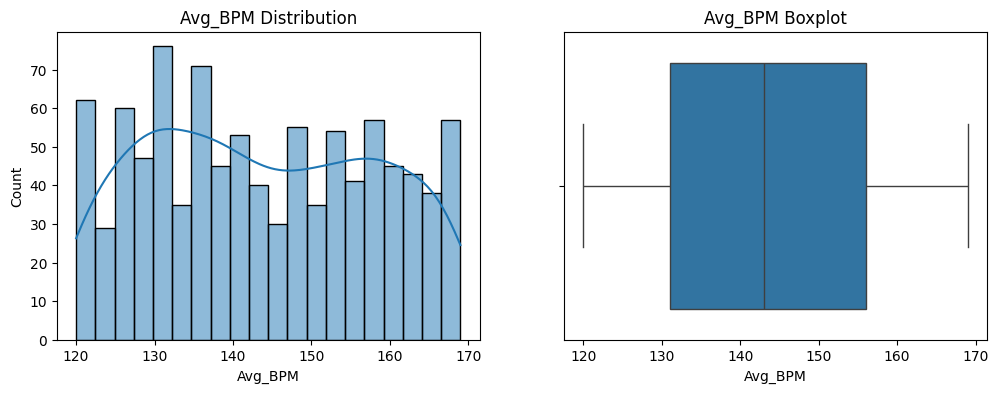

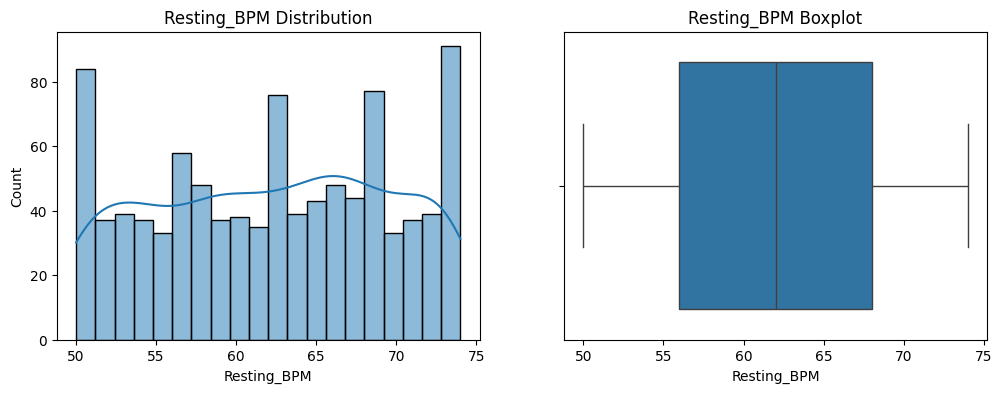

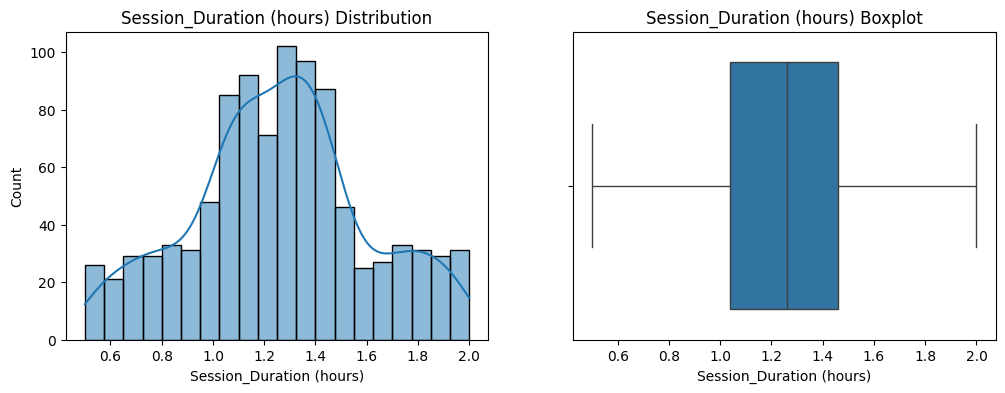

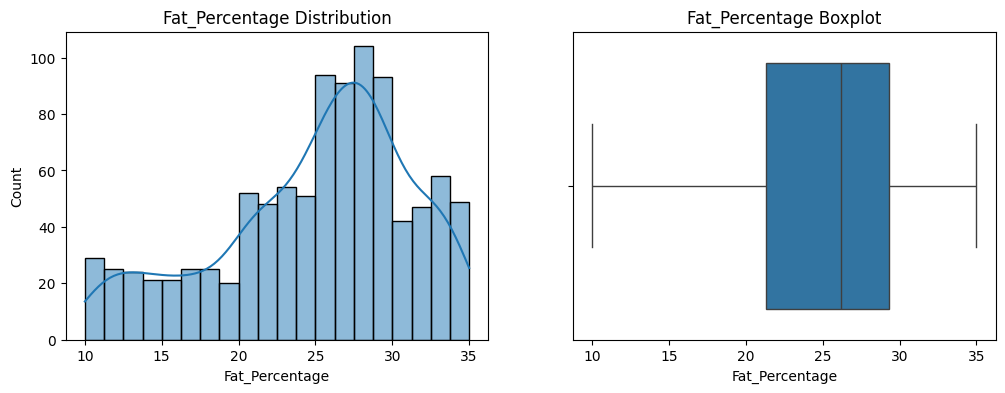

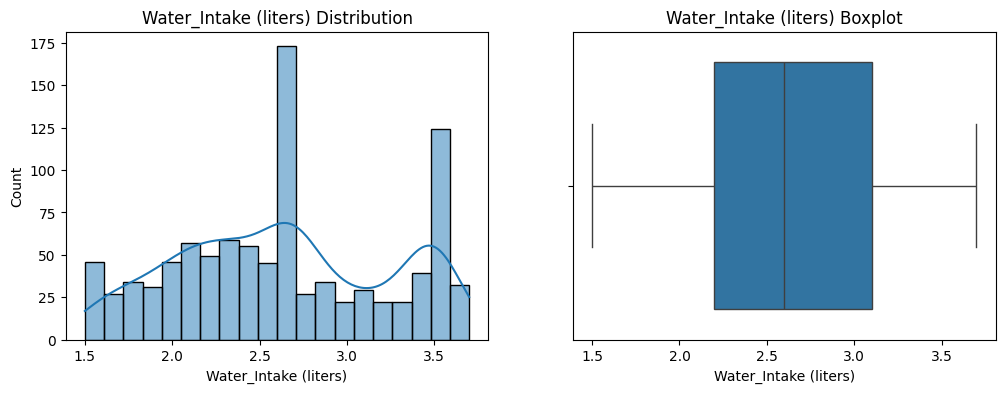

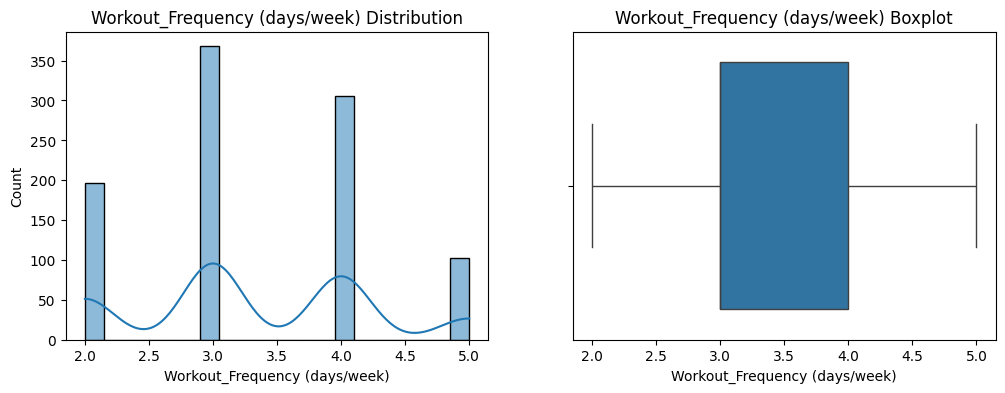

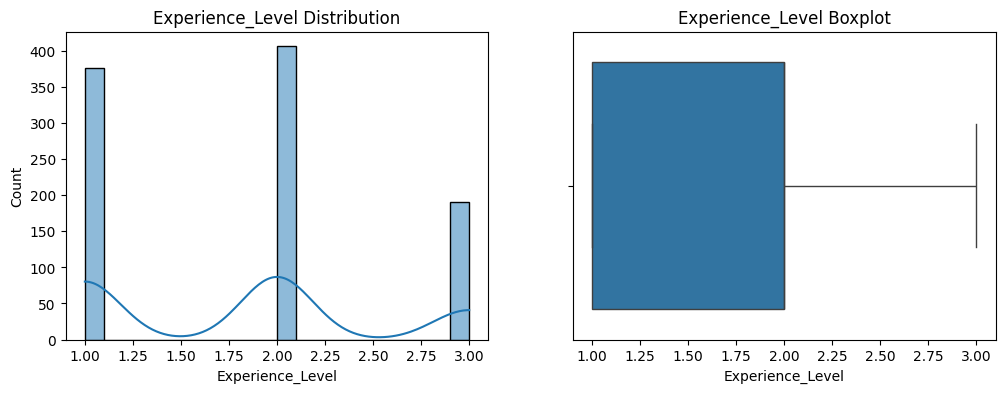

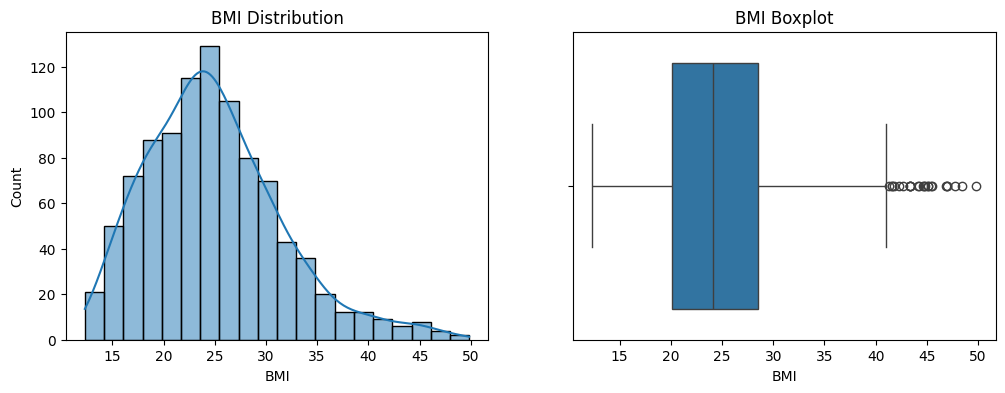

In [9]:
for feature in numerical_features:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[feature], kde=True, ax=ax[0], bins=20)
    ax[0].set_title(f'{feature} Distribution')
    sns.boxplot(x=df[feature], ax=ax[1])
    ax[1].set_title(f'{feature} Boxplot')
    plt.show()

In [10]:
def cap_outliers(df,column, up):
    upper = df[column].quantile(up)
    df[column] = np.where(df[column] > upper, upper, df[column])

In [11]:
cap_outliers(df, 'Weight (kg)', up =0.99)
cap_outliers(df, 'Calories_Burned', up = 0.99)
cap_outliers(df, 'Fat_Percentage', up = 0.99)
cap_outliers(df, 'BMI', up = 0.99)

In [12]:
df['Calories_Burned'] = np.log1p(df['Calories_Burned'])

In [13]:
X = df.drop('Calories_Burned', axis = 1)
y = df['Calories_Burned']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop = 'first')

In [16]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numerical_features),
    ('cat',categorical_transformer, categorical_features)
    ])

In [17]:
elasticnet_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('model',ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42))
])

In [18]:
elasticnet_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Weight (kg)',
                                                   'Height (m)', 'Max_BPM',
                                                   'Avg_BPM', 'Resting_BPM',
                                                   'Session_Duration (hours)',
                                                   'Fat_Percentage',
                                                   'Water_Intake (liters)',
                                                   'Workout_Frequency '
                                                   '(days/week)',
                                                   'Experience_Level', 'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Workout_Type'])])),
                ('model', ElasticNet(alpha=0.1, random_state=42))])

In [19]:
y_train_pred = elasticnet_pipeline.predict(X_train)
y_test_pred = elasticnet_pipeline.predict(X_test)

In [23]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [25]:
print("Test Set Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_test}")
print(f"  Mean Absolute Error (MAE): {mae_test}")
print(f"  R² Score: {r2_test}")

Test Set Evaluation:
  Mean Squared Error (MSE): 0.017127841686765812
  Mean Absolute Error (MAE): 0.10209873895986953
  R² Score: 0.8526218743732435


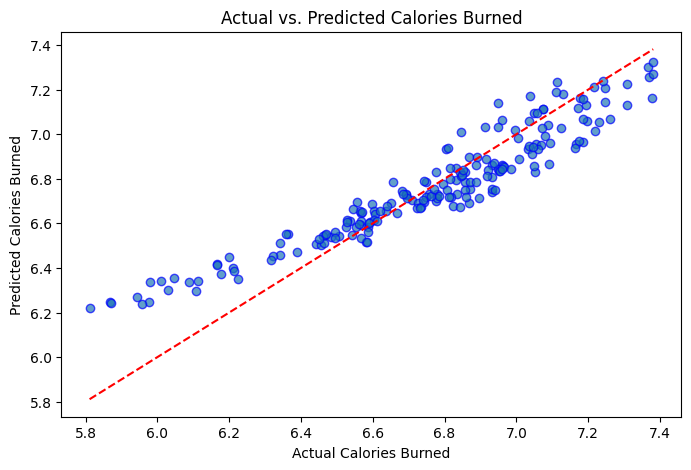

In [29]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, y_test_pred,edgecolors = 'blue', alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned')
plt.show()

In [30]:
import joblib
joblib.dump(elasticnet_pipeline, 'elasticnet_pipeline.pkl')

['elasticnet_pipeline.pkl']